<div class="alert alert-success">
    
**Комментарий ревьюера**

Привет, Владимир! Меня зовут Сысоева Вера и я буду помогать тебе с этим проектом.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные и отмечены **#ок** - всё сделано правильно; жёлтые и отмечены **#можно лучше** - есть замечания, но не критично; красные с пометкой **#ошибка** - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

# Загрузка данных

In [1]:
import math as mt 
from scipy import stats as st
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
df_clients=pd.read_csv('https://code.s3.yandex.net/datasets/telecom_clients.csv')
df_datasets=pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Данные верно подгружены.

Дополнительно для импорта можно также использовать конструкцию try-except:
    
```
try:
      df_clients=pd.read_csv('https://code.s3.yandex.net/datasets/telecom_clients.csv')
except:
      print("Файл не найден")
    
```
    
Это во-первых, позволит при отсутствии файла завершить выполнение ячейки штатно, без ошибки. А также аналогичный способ можно использовать в случае возможного хранения файла в нескольких местах, например, локально и на сервере.
    
```
try:
      df_clients=pd.read_csv('https://code.s3.yandex.net/datasets/telecom_clients.csv')
except:
      df_clients = pd.read_csv('telecom_clients.csv')
    
``` 
</div>

# Цели проекта:

**Найти клиентов, которые:
а) переплачивают на текущих тарифах;
б) сэкономят, если перейдут на более дорогой тариф.**

# Содержание

1. [Часть 1 .Предобработка данных](#1)<br/>1.1  [Создадим таблицу с данными о тарифах](#1.1)<br/>1.2 [Перевод в правильный формат](#1.2)<br/>1.3 [Поиск дубликатов](#1.3)<br/>1.4 [Вывод по первой части](#1.4)

2. [Часть 2.Исследовательский анализ](#2)<br/>2.1[Создадим новую таблицу где будет вся информация о клиентах, тарифе, количестве минут , платы за тариф](#2_1)<br/>2.2[Количество операторов у каждого клиента](#2_2)<br/>2.3[Ежемесяная плата за тариф](#2_3)<br/>2.4[Оптимальный тариф](#2_4)<br/>2.5[Лучший тариф для каждого клиента](#2_5)<br/>2.6[Переплата](#2_6)<br/>2.7[Вывод по второй части](#2_7)

3. [Часть 3.Активные клиенты](#3)<br/>4.1[Вывод по третьей части](#3_1)

4. [Рекомендации](#4)

5. [Гипотезы](#5)

6. [Общий вывод](#6)

## Часть 1. Предобработка данных
<a id="1"></a>

In [3]:
def all_info(df):
    print('----------Первые 5 строк----------')
    display(df.head(5))
    print('----------тип данных----------')
    display(df.info())
    print('----------дубликаты----------')
    display(df.duplicated().sum())
    print('----------пропуски----------')
    display(df.isna().sum())
all_info(df_clients)

----------Первые 5 строк----------


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


----------тип данных----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


None

----------дубликаты----------


0

----------пропуски----------


user_id        0
tariff_plan    0
date_start     0
dtype: int64

**В таблице df_clients представлена информация о клиентах,тарифном плане и дате регистрации на сервисе. Данный датафрейм состоит из 732 строк  , пропусков также как и дубликатов нет**

In [4]:
def all_info(df):
    print('----------Первые 5 строк----------')
    display(df.head(5))
    print('----------тип данных----------')
    display(df.info())
    print('----------дубликаты----------')
    display(df.duplicated().sum())
    print('----------пропуски----------')
    display(df.isna().sum())
all_info(df_datasets)

----------Первые 5 строк----------


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


----------тип данных----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


None

----------дубликаты----------


4900

----------пропуски----------


user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

**df_datasets представлен в виде 53902 строк. Достаточно большое количество дубликатов которые надо удалить 4900 строк. Есть пропуски в столбцах internal и operator_id.** 
- столбец date привести к типу datetime
- столбец internal привести к типу boolean
- столбец operator_id привести к типу integer
- в столбце пропуски заменить на заглушку -1


<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Отличное использование функции для получения общих сведений о сырых данных.

Давай в итоге прокомментируем, что мы получили в результате.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>+
</div>

### **Создадим таблицу с данными о тарифах**
<a id="1.1"></a>

In [5]:
df_tarif = {'Tariff': ['A', 'B', 'C'],
        'monthly fee(rub)': [4000, 2000, 1000],
        'Incoming ': [0,0,0],
        'Additional operator fee(rub)':[50,150,300],
        'Outgoing calls within(min)':[2000 ,500 ,0],
        'Price over the limit(rub/min)':[0.1 ,0.15 ,0.3 ],
        'Outgoing calls,except internal(rub/min)':[0.3 ,0.5 ,0.7]
}
df_tarif = pd.DataFrame(df_tarif)
df_tarif

,Tariff,monthly fee(rub),Incoming,Additional operator fee(rub),Outgoing calls within(min),Price over the limit(rub/min),"Outgoing calls,except internal(rub/min)"
0,A,4000,0,50,2000,0.10,0.3
1,B,2000,0,150,500,0.15,0.5
2,C,1000,0,300,0,0.30,0.7


### **Перевод в правильный формат**
<a id="1.2"></a>

In [6]:
df_datasets['date'] = pd.to_datetime(df_datasets['date']).dt.date
df_datasets['date'] = df_datasets['date'].astype('datetime64[ns]')
df_datasets['internal'] = df_datasets['internal'].astype('bool')
df_datasets['operator_id']=df_datasets['operator_id'].astype('Int64')
df_datasets['operator_id'] = df_datasets['operator_id'].fillna(-1)

### **Поиск дубликатов**
<a id="1.3"></a>

In [7]:
df_datasets[df_datasets.duplicated(keep=False)]
df_datasets_unique = df_datasets.drop_duplicates().reset_index(drop=True)
df_datasets_unique

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,-1,True,2,0,4
1,166377,2019-08-05,out,True,880022,True,3,0,5
2,166377,2019-08-05,out,True,880020,True,1,0,1
3,166377,2019-08-05,out,True,880020,False,1,10,18
4,166377,2019-08-05,out,False,880022,True,3,0,25
...,...,...,...,...,...,...,...,...,...
48997,168606,2019-11-10,out,True,957922,False,1,0,25
48998,168606,2019-11-10,out,True,957922,True,1,0,38
48999,168606,2019-11-11,out,True,957922,False,2,479,501
49000,168606,2019-11-15,out,True,957922,False,4,3130,3190


**После удаления дубликатов в таблице стало 49002 строки**

In [8]:
merged_df = pd.merge(df_datasets_unique, df_clients, on='user_id', how='inner').drop('date_start', axis=1)
merged_df['month'] = merged_df['date'].dt.month
merged_df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,month
0,166377,2019-08-04,in,False,-1,True,2,0,4,B,8
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,8
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,8
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,8
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,8
...,...,...,...,...,...,...,...,...,...,...,...
48997,168606,2019-11-10,out,True,957922,False,1,0,25,C,11
48998,168606,2019-11-10,out,True,957922,True,1,0,38,C,11
48999,168606,2019-11-11,out,True,957922,False,2,479,501,C,11
49000,168606,2019-11-15,out,True,957922,False,4,3130,3190,C,11


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 49001
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  int64         
 1   date                 49002 non-null  datetime64[ns]
 2   direction            49002 non-null  object        
 3   internal             49002 non-null  bool          
 4   operator_id          49002 non-null  Int64         
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  int64         
 8   total_call_duration  49002 non-null  int64         
 9   tariff_plan          49002 non-null  object        
 10  month                49002 non-null  int64         
dtypes: Int64(1), bool(2), datetime64[ns](1), int64(5), object(2)
memory usage: 3.9+ MB


In [10]:
display(merged_df.isna().sum())

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
tariff_plan            0
month                  0
dtype: int64

**Данную таблицу вы получили в результате объединения двух датафремов , очищенного от дубликатов - df_datasets_unique, и таблицей - df_clients . В таблице появилась информация о том какой тариф используют клиенты. После обьединения все данные полные , пропусков нет.**

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Здесь мы получаем основную таблицу для анализа. Нужно подробно прокомментировать, как прошло объединение таблиц, какие данные у нас сохранились, удалось ли для каждого клиента найти тариф и.т.п.


    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>+
</div>

In [11]:
display(merged_df[['call_duration', 'total_call_duration']].describe())

,call_duration,total_call_duration
count,49002.000000,49002.000000
mean,866.282091,1156.558202
std,3775.503352,4451.473661
min,0.000000,0.000000
25%,0.000000,46.000000
50%,37.000000,208.000000
75%,570.000000,901.000000
max,144395.000000,166155.000000


In [12]:
merged_df = merged_df[~((merged_df['total_call_duration'] > 5000))]
merged_df = merged_df[~((merged_df['month'] == 8))]
merged_df.reset_index(drop=True)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,month
0,166377,2019-09-02,in,False,880028,False,2,66,75,B,9
1,166377,2019-09-02,in,False,880026,False,1,31,34,B,9
2,166377,2019-09-02,out,False,880026,False,16,1853,1983,B,9
3,166377,2019-09-02,out,False,880026,True,6,0,168,B,9
4,166377,2019-09-02,out,False,880028,False,20,2529,2687,B,9
...,...,...,...,...,...,...,...,...,...,...,...
45094,168606,2019-11-10,out,True,957922,False,1,0,25,C,11
45095,168606,2019-11-10,out,True,957922,True,1,0,38,C,11
45096,168606,2019-11-11,out,True,957922,False,2,479,501,C,11
45097,168606,2019-11-15,out,True,957922,False,4,3130,3190,C,11


**В данной таблице я решил отфильтровать данные по столбцу total_call_duration , которые превышают 5000 минут.Данный порог выбран , чтобы извежать слишком большого удлаения данных , и при это не оставить выбросов. Также так как за месяц 8 слишком мало данных исключил данный месяц. 8.8% строк было удалено**

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Что мы делаем в этой ячейке кода? Фильтруем данные? Почему выбран данный порог? Какой процент данных мы потеряли таким образом?
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>+
</div>

### **Вывод по первой части:**
<a id="1.4"></a>

В первой части после загрузки данных , было создана таблица с информацией о тарифах. Были переведены данные в правильный формат. Было удаленно 4900 будликатов.Также были отсортированны данные . Удалены строки с аномальными значениями по столбцу total_call_duration. Из 49002 строк было оставлено 45099 , что составило 8.8% удаленых строк

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Первая часть верно дополнена.
    
</div>

## Часть 2.Исследовательский анализ
<a id="2"></a>

Всего пользователей: 732


,tariff_plan,user_id
0,A,76
1,B,261
2,C,395


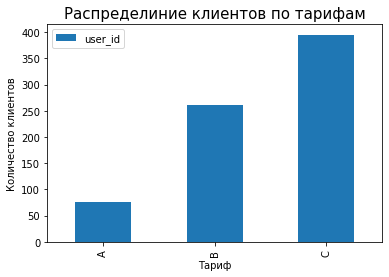

In [13]:
bar_tr_count=df_clients.groupby('tariff_plan')['user_id'].agg('count').reset_index()
fig = bar_tr_count.plot.bar(x='tariff_plan')
plt.title('Распределиние клиентов по тарифам',fontsize=15)
plt.xlabel('Тариф')
plt.ylabel('Количество клиентов')
fig.figure.show()
print(f'Всего пользователей:',df_clients['user_id'].nunique())
display(bar_tr_count)

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Давай оформим график: сделаем заголовок и понятные подписи осей.
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>+
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Отлично
    
</div>

**Большинство клиентов пользуются тарифом С. Тариф А самый не популярный , возможно клиентов пугает ежемесячная плата**

### **Создадим новую таблицу где будет вся информация о клиентах, тарифе, количестве минут , платы за тариф**
<a id="2.1"></a>

In [14]:
df_price_month = merged_df.groupby(['user_id', 'month'])['calls_count'].sum().reset_index()
df_price_month=df_price_month.drop('calls_count',axis=1)
df_price_month

,user_id,month
0,166377,9
1,166377,10
2,166377,11
3,166391,9
4,166391,10
...,...,...
702,168583,11
703,168598,11
704,168601,11
705,168603,11


In [15]:
#оператор - оператору
op_out_call = (
    merged_df.loc[(merged_df['direction']=="out")&(merged_df['internal']==True)]
    .groupby(['user_id','month'])['total_call_duration'].sum().reset_index()
)
out_call = df_price_month.merge(op_out_call, on=['user_id','month'], how='outer')
out_call = out_call.rename(columns={'total_call_duration_x':'op_out_call', 'total_call_duration_y':'cl_out_call'})

out_call

,user_id,month,total_call_duration
0,166377,9,9.0
1,166377,10,5.0
2,166377,11,127.0
3,166391,9,NaN
4,166391,10,NaN
...,...,...,...
702,168583,11,NaN
703,168598,11,NaN
704,168601,11,0.0
705,168603,11,NaN


In [16]:
#оператор - клиент
cl_out_call_1 = (
    merged_df.loc[(merged_df['direction']=="out")&(merged_df['internal']==False)]
    .groupby(['user_id','month'])['total_call_duration'].sum().reset_index()
)
out_call = out_call.merge(cl_out_call_1, on=['user_id','month'], how='outer')
out_call = out_call.rename(columns={'total_call_duration_x':'op_out_call', 'total_call_duration_y':'cl_out_call'})


out_call

,user_id,month,op_out_call,cl_out_call
0,166377,9,9.0,105835.0
1,166377,10,5.0,99207.0
2,166377,11,127.0,95384.0
3,166391,9,NaN,NaN
4,166391,10,NaN,NaN
...,...,...,...,...
702,168583,11,NaN,NaN
703,168598,11,NaN,NaN
704,168601,11,0.0,33192.0
705,168603,11,NaN,1187.0


In [17]:
out_call = out_call.merge(df_clients , on='user_id', how='left')
out_call

,user_id,month,op_out_call,cl_out_call,tariff_plan,date_start
0,166377,9,9.0,105835.0,B,2019-08-01
1,166377,10,5.0,99207.0,B,2019-08-01
2,166377,11,127.0,95384.0,B,2019-08-01
3,166391,9,NaN,NaN,C,2019-08-01
4,166391,10,NaN,NaN,C,2019-08-01
...,...,...,...,...,...,...
702,168583,11,NaN,NaN,B,2019-10-31
703,168598,11,NaN,NaN,C,2019-10-31
704,168601,11,0.0,33192.0,C,2019-10-31
705,168603,11,NaN,1187.0,B,2019-10-31


In [18]:
out_call= out_call.drop('date_start', axis=1)


### **Количество операторов у каждого клиента**
<a id="2.2"></a>

In [19]:

count_oper = merged_df.groupby(['user_id', 'month'])['operator_id'].nunique()

out_call = out_call.merge(count_oper, on=['user_id','month'])
out_call = out_call.rename(columns={'operator_id': 'count_oper'})
out_call

,user_id,month,op_out_call,cl_out_call,tariff_plan,count_oper
0,166377,9,9.0,105835.0,B,5
1,166377,10,5.0,99207.0,B,6
2,166377,11,127.0,95384.0,B,5
3,166391,9,NaN,NaN,C,2
4,166391,10,NaN,NaN,C,1
...,...,...,...,...,...,...
702,168583,11,NaN,NaN,B,3
703,168598,11,NaN,NaN,C,2
704,168601,11,0.0,33192.0,C,3
705,168603,11,NaN,1187.0,B,2


In [20]:
out_call['cl_out_call'] = out_call['cl_out_call'].fillna(0)

### Ежемесяная плата за тариф
<a id="2.3"></a>

In [21]:
def price_for_month(row):
    # Ежемесячную плату за тариф будем расчитывать по следующей формуле :
    #цена сверх лимита(internal_out_price)+стоимость исходяцих звонков(external_out_price)+цена за тариф(tariff_price)+количество операторов(row['count_oper'])*плата за оператора(price_1_operator)
    
   
    if row['tariff_plan']=='A':
        tariff_minutes = df_tarif['Outgoing calls within(min)'][0]-row['op_out_call']#количество бесплатных минут
        top_limit = df_tarif['Price over the limit(rub/min)'][0]#цена сверх лимита
        external_out_price = row['cl_out_call'] * df_tarif['Outgoing calls,except internal(rub/min)'][0]#стоимость исходяцих звонков
        triff_price = df_tarif['monthly fee(rub)'][0]#цена за тариф
        price_1_operator = df_tarif['Additional operator fee(rub)'][0]#плата за оператора
        
    elif row['tariff_plan']=='B':
        tariff_minutes = df_tarif['Outgoing calls within(min)'][1]-row['op_out_call']
        top_limit = df_tarif['Price over the limit(rub/min)'][1]
        external_out_price = row['cl_out_call'] * df_tarif['Outgoing calls,except internal(rub/min)'][1]
        triff_price = df_tarif['monthly fee(rub)'][1]
        price_1_operator = df_tarif['Additional operator fee(rub)'][1]
        
    elif row['tariff_plan']=='C':
        tariff_minutes = df_tarif['Outgoing calls within(min)'][2]-row['op_out_call']
        top_limit = df_tarif['Price over the limit(rub/min)'][2]
        external_out_price = row['cl_out_call'] * df_tarif['Outgoing calls,except internal(rub/min)'][2]
        triff_price = df_tarif['monthly fee(rub)'][2]
        price_1_operator = df_tarif['Additional operator fee(rub)'][2]
   #цена сверх лимита     
    if tariff_minutes < 0:
        internal_out_price = abs(tariff_minutes) * top_limit
    else:
        internal_out_price = 0
        
    
    return internal_out_price + external_out_price + triff_price + row['count_oper'] * price_1_operator
out_call['current_price'] = round(out_call.apply(price_for_month, axis=1), 1)
out_call.sort_values(by='current_price', ascending=False)

,user_id,month,op_out_call,cl_out_call,tariff_plan,count_oper,current_price
607,168062,11,31429.0,943548.0,A,28,291407.3
463,167626,10,1.0,932152.0,A,49,286095.6
673,168361,11,37.0,767991.0,A,26,235697.3
292,167125,9,183.0,326416.0,C,9,232246.1
79,166658,10,0.0,437097.0,B,17,223098.5
...,...,...,...,...,...,...,...
128,166726,11,NaN,0.0,C,1,1300.0
346,167244,10,NaN,0.0,C,1,1300.0
130,166727,10,NaN,0.0,C,1,1300.0
308,167162,11,NaN,0.0,C,1,1300.0


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо написана функция для расчета затрат на тарифе, правильно, что ты используешь табличные значения.
    
</div>

### Оптимальный тариф
<a id="2.4"></a>

In [22]:
def price_tariff_A(row):
   
    tariff_minutes = df_tarif['Outgoing calls within(min)'][0]-row['op_out_call']
    top_limit = df_tarif['Price over the limit(rub/min)'][0]
    external_out_price = row['cl_out_call'] * df_tarif['Outgoing calls,except internal(rub/min)'][0]
    triff_price = df_tarif['monthly fee(rub)'][0]
    price_1_operator = df_tarif['Additional operator fee(rub)'][0]
    if tariff_minutes < 0:
        internal_out_price = abs(tariff_minutes) * top_limit
    else:
        internal_out_price = 0
    
    return internal_out_price+external_out_price + triff_price + row['count_oper'] * price_1_operator
out_call['price_tariff_A'] = round(out_call.apply(price_tariff_A, axis=1), 1)

def price_tariff_B(row):
   
    tariff_minutes = df_tarif['Outgoing calls within(min)'][1]-row['op_out_call']
    top_limit = df_tarif['Price over the limit(rub/min)'][1]
    external_out_price = row['cl_out_call'] * df_tarif['Outgoing calls,except internal(rub/min)'][1]
    triff_price = df_tarif['monthly fee(rub)'][1]
    price_1_operator = df_tarif['Additional operator fee(rub)'][1]

    if tariff_minutes < 0:
        internal_out_price = abs(tariff_minutes) * top_limit
    else:
        internal_out_price = 0
    
    return internal_out_price+external_out_price + triff_price + row['count_oper'] * price_1_operator
out_call['price_tariff_B'] = round(out_call.apply(price_tariff_B, axis=1), 1)


def price_tariff_C(row):
   
    tariff_minutes = df_tarif['Outgoing calls within(min)'][2]-row['op_out_call']
    top_limit = df_tarif['Price over the limit(rub/min)'][2]
    external_out_price = row['cl_out_call'] * df_tarif['Outgoing calls,except internal(rub/min)'][2]
    triff_price = df_tarif['monthly fee(rub)'][2]
    price_1_operator = df_tarif['Additional operator fee(rub)'][2]
  
    if tariff_minutes < 0:
        internal_out_price = abs(tariff_minutes) * top_limit
    else:
        internal_out_price = 0
        
    return internal_out_price+external_out_price + triff_price + row['count_oper'] * price_1_operator
out_call['price_tariff_C'] = round(out_call.apply(price_tariff_C, axis=1), 1)
out_call.sort_values(by='current_price', ascending=False)

,user_id,month,op_out_call,cl_out_call,tariff_plan,count_oper,current_price,price_tariff_A,price_tariff_B,price_tariff_C
607,168062,11,31429.0,943548.0,A,28,291407.3,291407.3,482613.4,679312.3
463,167626,10,1.0,932152.0,A,49,286095.6,286095.6,475426.0,668206.7
673,168361,11,37.0,767991.0,A,26,235697.3,235697.3,389895.5,546404.8
292,167125,9,183.0,326416.0,C,9,232246.1,102374.8,166558.0,232246.1
79,166658,10,0.0,437097.0,B,17,223098.5,135979.1,223098.5,312067.9
...,...,...,...,...,...,...,...,...,...,...
128,166726,11,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0
346,167244,10,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0
130,166727,10,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0
308,167162,11,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0


<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Здесь только один вопрос: почему в первой строке стоимость на тарифе А и текущая стоимость услуг расходятся?
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>малость самую слепой , все исправил
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо.
    
</div>

### Лучший тариф для каждого клиента
<a id="2.5"></a>

In [23]:
out_call["best_tariff"] = out_call[["price_tariff_A", "price_tariff_B", "price_tariff_C"]].min(axis=1)
out_call.sort_values(by='current_price', ascending=False)

,user_id,month,op_out_call,cl_out_call,tariff_plan,count_oper,current_price,price_tariff_A,price_tariff_B,price_tariff_C,best_tariff
607,168062,11,31429.0,943548.0,A,28,291407.3,291407.3,482613.4,679312.3,291407.3
463,167626,10,1.0,932152.0,A,49,286095.6,286095.6,475426.0,668206.7,286095.6
673,168361,11,37.0,767991.0,A,26,235697.3,235697.3,389895.5,546404.8,235697.3
292,167125,9,183.0,326416.0,C,9,232246.1,102374.8,166558.0,232246.1,102374.8
79,166658,10,0.0,437097.0,B,17,223098.5,135979.1,223098.5,312067.9,135979.1
...,...,...,...,...,...,...,...,...,...,...,...
128,166726,11,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0
346,167244,10,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0
130,166727,10,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0
308,167162,11,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0


In [59]:
merge_sum = out_call.pivot_table(index=['user_id'],
                                  values = ['tariff_plan','current_price', 'price_tariff_A','price_tariff_B','price_tariff_C',
                                            'best_tariff'],
                                  aggfunc = {'current_price': sum,
                                             'price_tariff_A': sum, 
                                             'price_tariff_B' : sum,
                                             'price_tariff_C' : sum
                                             })
        
merge_sum.head()

,current_price,price_tariff_A,price_tariff_B,price_tariff_C
user_id,,,,
166377,158613.0,102927.8,158613.0,218140.5
166391,4500.0,12250.0,6750.0,4500.0
166392,5700.0,12450.0,7350.0,5700.0
166399,3200.0,8200.0,4600.0,3200.0
166405,216060.2,137011.1,216060.2,299543.8


<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Да, сумма - это один из вариантов, также можно смотреть и среднее и максимальный показатель.
    
</div>

In [65]:

def optimal_tariff(row):
    if row['price_tariff_A'] < row['price_tariff_B'] and row['price_tariff_A'] < row['price_tariff_C']:
        return 'A'
    elif row['price_tariff_B'] < row['price_tariff_A'] and row['price_tariff_B'] < row['price_tariff_C']:
        return 'B'
    else:
        return 'C'

# Добавляем новый столбец с оптимальным тарифом
merge_sum['optimal_tariff'] = merge_sum.apply(optimal_tariff, axis=1)

merge_sum.head()

,current_price,price_tariff_A,price_tariff_B,price_tariff_C,optimal_tariff
user_id,,,,,
166377,158613.0,102927.8,158613.0,218140.5,A
166391,4500.0,12250.0,6750.0,4500.0,C
166392,5700.0,12450.0,7350.0,5700.0,C
166399,3200.0,8200.0,4600.0,3200.0,C
166405,216060.2,137011.1,216060.2,299543.8,A


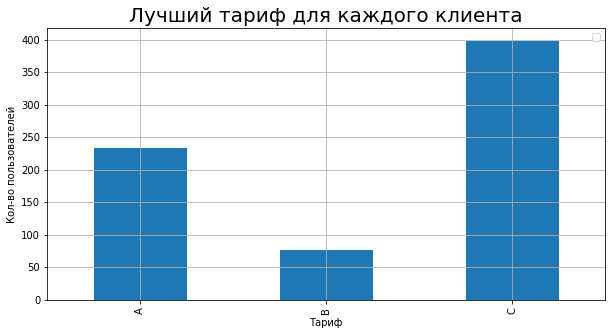

,count
,user_id
optimal_tariff,
A,233
B,76
C,398


In [54]:
w3= out_call.pivot_table(index=['optimal_tariff'],values=['user_id'],aggfunc=['count'])
w3.plot(y='count',kind='bar', figsize =(10,5),grid=True )    
plt.title('Лучший тариф для каждого клиента',fontsize = 20)
plt.xlabel('Тариф')
plt.ylabel('Кол-во пользователей')
plt.legend('')
plt.show()
w3

**Если клиенты выберут оптимальный для себя тариф , то распределение будет выглядить следующим образом : Тарифом С все также будут пользоваться больше всего клиентов 398. Тарифом А 233. Тарифом В меньше всего 76.**

def find_min_rate(row):
    return min(row['price_tariff_A'],row['price_tariff_B'],row['price_tariff_C'])
out_call['best_tariff_price'] =  out_call.apply(find_min_rate,axis=1)
out_call

### Переплата
<a id="2.6"></a>

In [25]:
out_call['overpayment']= out_call['current_price'] - out_call['best_tariff']
out_call.sort_values(by='current_price', ascending=False)

,user_id,month,op_out_call,cl_out_call,tariff_plan,count_oper,current_price,price_tariff_A,price_tariff_B,price_tariff_C,best_tariff,optimal_tariff,overpayment
607,168062,11,31429.0,943548.0,A,28,291407.3,291407.3,482613.4,679312.3,291407.3,A,0.0
463,167626,10,1.0,932152.0,A,49,286095.6,286095.6,475426.0,668206.7,286095.6,A,0.0
673,168361,11,37.0,767991.0,A,26,235697.3,235697.3,389895.5,546404.8,235697.3,A,0.0
292,167125,9,183.0,326416.0,C,9,232246.1,102374.8,166558.0,232246.1,102374.8,A,129871.3
79,166658,10,0.0,437097.0,B,17,223098.5,135979.1,223098.5,312067.9,135979.1,A,87119.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,166726,11,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0,C,0.0
346,167244,10,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0,C,0.0
130,166727,10,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0,C,0.0
308,167162,11,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0,C,0.0


In [26]:
out_call['overpayment'].describe()

count       707.000000
mean       4776.704950
std       13041.481681
min           0.000000
25%           0.000000
50%         362.000000
75%        2259.600000
max      129871.300000
Name: overpayment, dtype: float64

**Средняя переплата сосатвляет 4776.7 рублей . Медианная 362 рубля . В таблице много клиентов которые пользуются оптимальными тарифами . Уберем их чтоб увидеть средее и медиану без выброса.**

In [27]:
out_call_without_0 = out_call.query('overpayment != 0')

In [28]:
out_call_without_0['overpayment'].describe()

count       396.000000
mean       8528.107071
std       16489.941578
min           7.200000
25%         698.100000
50%        1909.400000
75%        8174.850000
max      129871.300000
Name: overpayment, dtype: float64

**После того как убрали клиентов с оптимальними тарифами показатели среднего и медианны сильно возрасли . 8528 рублей - средняя переплата . 1909 рублей - медианнаяф переплата .** 

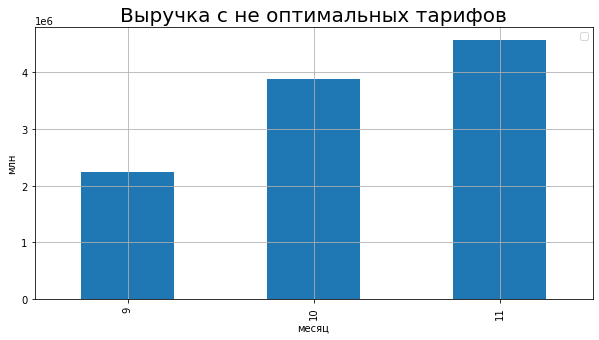

,sum
,current_price
month,
9,2248810.6
10,3873964.6
11,4564670.0


In [29]:
w1= out_call.pivot_table(index=['month'],values=['current_price'],aggfunc=['sum'])
w1.plot(y='sum',kind='bar', figsize =(10,5),grid=True )    
plt.title('Выручка с не оптимальных тарифов',fontsize = 20)
plt.xlabel('месяц')
plt.ylabel('млн')
plt.legend('')
plt.show()
w1

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Из этой картины и того, что мы получили далее можно предположить, что данные за август не полные. Это нужно рассмотреть в начале исследования, посмотреть, за какой период мы будем брать для анализа.
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>+
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо.
    
</div>

**На графике видно, что каждый месяц выручка от клиентов росла.Скорее всего связанно это с ростом количества клиентов**

In [30]:
out_call.query('month ==9')['user_id'].nunique()

173

In [31]:
out_call.query('month ==11')['user_id'].nunique()

261

**Как и говорилось выше , клиентов стало больше**

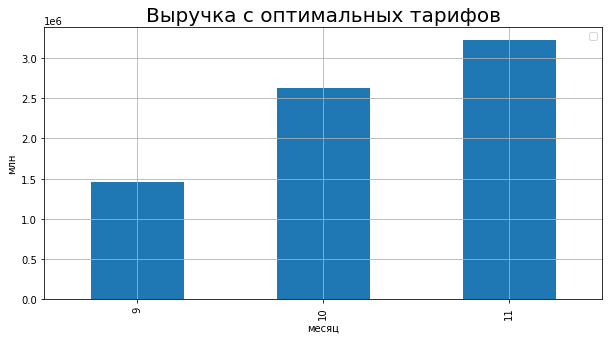

,sum
,best_tariff
month,
9,1454864.0
10,2632962.5
11,3222488.3


In [32]:
w2=out_call.pivot_table(index=['month'],values=['best_tariff'],aggfunc=['sum'])
w2.plot(y='sum',kind='bar', figsize =(10,5),grid=True)     

plt.title('Выручка с оптимальных тарифов',fontsize = 20)
plt.xlabel('месяц')
plt.ylabel('млн')
plt.legend('')
plt.show()
w2

**Также как и с не оптимальными выручка каждый месяц растет**

In [33]:
print(f'{round(out_call[out_call["overpayment"] != 0].shape[0] / out_call.shape[0] * 100, 2)}% клиентов пользуются',
     'не выгодным тарифом.')

56.01% клиентов пользуются не выгодным тарифом.


### **Вывод по второй части:**
<a id="2.7"></a>

Во второй части была создана таблица с тратами каждого клиента в месяц. Была расчитана переплата на каждого клиента , в среднем клиенты переплачивают -  6446.4 рублей(если убрать из данных пользовалетей с оптимальным тарифом). Выяснили что каждый месяц количество клиентов растет , например в 9 месяц было 173 клиента , а в 11 месяце стало 261 клиент. Такж растет и выручка, в 9 месяце выручка составляла - 2248810 , в 11 месяце - 4564670

## Часть 3.Активные клиенты
<a id="3"></a>

**Активными клиентами будет считать тех , кто совершил хотя-бы одно действие в месяце 11.**

In [34]:
active_cl = out_call.query('month == 11').reset_index(drop=True)

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо. Это возможный способ определения активных клиентов. Только это стоило сделать в начале, до всех расчетов, чтобы расчеты и аналз проводить только для активных клиентов.
    
</div>

In [35]:
active_cl.sort_values(by='current_price', ascending=False)

,user_id,month,op_out_call,cl_out_call,tariff_plan,count_oper,current_price,price_tariff_A,price_tariff_B,price_tariff_C,best_tariff,optimal_tariff,overpayment
204,168062,11,31429.0,943548.0,A,28,291407.3,291407.3,482613.4,679312.3,291407.3,A,0.0
238,168361,11,37.0,767991.0,A,26,235697.3,235697.3,389895.5,546404.8,235697.3,A,0.0
25,166658,11,0.0,401955.0,B,16,205377.5,125386.5,205377.5,287168.5,125386.5,A,79991.0
219,168187,11,5113.0,543789.0,A,47,169798.0,169798.0,281636.4,397286.2,169798.0,A,0.0
65,166983,11,2708.0,180159.0,C,5,129423.7,58368.5,93160.7,129423.7,58368.5,A,71055.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,166726,11,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0,C,0.0
151,167721,11,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0,C,0.0
222,168202,11,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0,C,0.0
24,166649,11,NaN,0.0,C,1,1300.0,4050.0,2150.0,1300.0,1300.0,C,0.0


Активных пользователей: 261


,tariff_plan,user_id
0,A,30
1,B,96
2,C,135


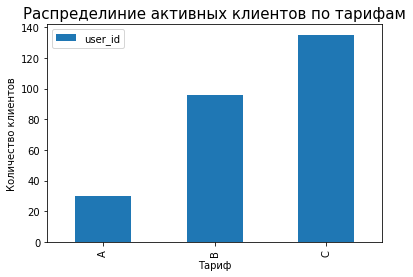

In [36]:
# количество активных пользователей , которых совершили хотябы 1 звонок в 11 месяце
bar_activ_cl = active_cl.groupby('tariff_plan')['user_id'].nunique().reset_index()
fig = bar_activ_cl.plot.bar(x='tariff_plan')
plt.title('Распределиние активных клиентов по тарифам',fontsize=15)
plt.xlabel('Тариф')
plt.ylabel('Количество клиентов')

fig.figure.show()
print(f'Активных пользователей:',active_cl['user_id'].nunique())
display(bar_activ_cl)


<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Здесь опять же нужно оформить график.
    
</div>

<div class="alert alert-info">
<font size="4", color = "black"><b>+</b></font>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

👍
    
</div>

**Большинство активных клиентов пользуются тарифом С.**

In [37]:
active_optimal_tariff = active_cl.query('overpayment == 0')
print(f'Количество активных клиентов с оптимальным  тарифом :',active_optimal_tariff['user_id'].nunique())

Количество активных клиентов с оптимальным  тарифом : 107


In [38]:
active_d_optimal_tariff = active_cl.query('overpayment > 0').reset_index(drop=True)
active_d_optimal_tariff.sort_values(by='overpayment', ascending=False)


,user_id,month,op_out_call,cl_out_call,tariff_plan,count_oper,current_price,price_tariff_A,price_tariff_B,price_tariff_C,best_tariff,optimal_tariff,overpayment
14,166658,11,0.0,401955.0,B,16,205377.5,125386.5,205377.5,287168.5,125386.5,A,79991.0
44,166983,11,2708.0,180159.0,C,5,129423.7,58368.5,93160.7,129423.7,58368.5,A,71055.2
62,167150,11,12935.0,145006.0,C,8,108784.7,48995.3,77568.2,108784.7,48995.3,A,59789.4
139,168412,11,9.0,143470.0,C,10,104431.7,47541.0,75235.0,104431.7,47541.0,A,56890.7
137,168336,11,2996.0,137837.0,C,14,102584.7,46150.7,73392.9,102584.7,46150.7,A,56434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,166541,11,177.0,8021.0,A,3,6556.3,6556.3,6460.5,7567.8,6460.5,B,95.8
53,167061,11,103.0,2138.0,B,3,3519.0,4791.4,3519.0,3427.5,3427.5,C,91.5
74,167275,11,158.0,2150.0,B,3,3525.0,4795.0,3525.0,3452.4,3452.4,C,72.6
15,166660,11,NaN,2459.0,B,3,3679.5,4887.7,3679.5,3621.3,3621.3,C,58.2


<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Для определения активных клиентов я согласна с рассмотрением только ноября. Но вот, чтобы смотреть и анализировать только этот месяц для ответа на основной вопрос - это сомнительно. Давай посмотрим, какой процент данных мы отбросили даже для активных клиентов таким образом?
</div>

<div class="alert alert-info">
<font size="4", color = "black"><b>44% данных отсеятся. Не удачная была идея, будем рассматравать полностью всех клиентов за 11 месяц </b></font>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Да, так будет правильнее.
    
</div>

In [39]:
active_d_optimal_tariff['overpayment'].describe()

count      154.000000
mean      8715.465584
std      14584.333908
min         21.800000
25%        691.050000
50%       2008.300000
75%      10729.500000
max      79991.000000
Name: overpayment, dtype: float64

**Как видим 154 клиента используют не оптимальный тариф. Средняя переплата составляет - 8715 рублей , медианная - 2008 рублей. Для сравнения посмотрим сколько переплачивали пользователи , которые являются не активными.Максимальная переплата за тариф составляет 79991 рубль**

In [40]:
inactive_cl = out_call.query('month != 11 and overpayment > 0')
inactive_cl['overpayment'].describe()

count       242.000000
mean       8408.878926
std       17623.930438
min           7.200000
25%         699.775000
50%        1731.200000
75%        6593.800000
max      129871.300000
Name: overpayment, dtype: float64

**Как видно , пользователи которые не являются активними переплачивали за тарифы меньше.Хотя максимальная переплата составляла 129871 рублей**

In [41]:

print(f'Выручка в 11 месяце:',round(active_cl['current_price'].sum(),2),'р')
print(f'Выручка в 11 месяце , если использовать оптимальный тариф:',round(active_cl['best_tariff'].sum(),2),'р')
print(f'Разница в %:',round((active_cl['current_price'].sum()/active_cl['best_tariff'].sum()-1)*100,1))

Выручка в 11 месяце: 4564670.0 р
Выручка в 11 месяце , если использовать оптимальный тариф: 3222488.3 р
Разница в %: 41.7


**Если поменять клиентам у которых на данный момент выбран не оптимальный тариф , то убытки компании составят 41.7%**

  tariff_plan  current_price
0           A      1125264.9
1           B      1542871.3
2           C      1896533.8
  tariff_plan  best_tariff
0           A    1101742.7
1           B    1058607.5
2           C    1062138.1


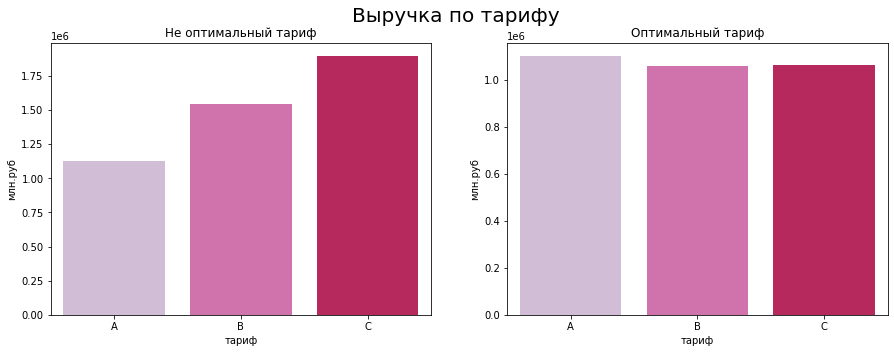

In [42]:
tarif_cur = (active_cl.groupby('tariff_plan')['current_price'].sum().reset_index())
tarif_bs = (active_cl.groupby('tariff_plan')['best_tariff'].sum().reset_index())

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Выручка по тарифу', fontsize=20)

sns.barplot(y='current_price', x='tariff_plan', data=tarif_cur, ax=ax[0], palette='PuRd')
ax[0].set_title('Не оптимальный тариф')
ax[0].set_ylabel('млн.руб')
ax[0].set_xlabel('тариф')

sns.barplot(y='best_tariff', x='tariff_plan', data=tarif_bs, ax=ax[1], palette='PuRd')
ax[1].set_title('Оптимальный тариф')
ax[1].set_ylabel('млн.руб')
ax[1].set_xlabel('тариф')
print(tarif_cur)
print(tarif_bs)
plt.show()

**На графике слева показанно, что в данный момент клиенты с тарифом С приносят больше всего денег компании. Почти на 700000 больше чем пользователи тарифа А.**
**На графике справа видно , что если перевести всех клиентов на оптимальный тариф то распреденение выручки выровняется**

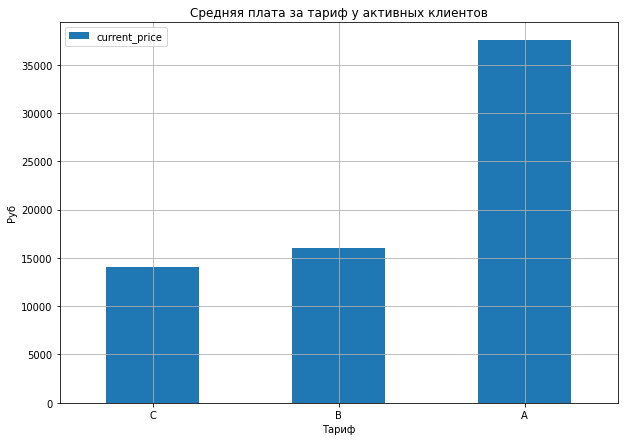

In [43]:
o2=active_cl.pivot_table(index = 'tariff_plan', values = 'current_price', aggfunc = 'mean').sort_values(by = 'tariff_plan', ascending = False).plot(kind = 'bar', figsize=(10, 7))
plt.title('Средняя плата за тариф у активных клиентов')
plt.ylabel('Руб')
plt.xlabel('Тариф')
plt.xticks(rotation = 0)
plt.grid()
plt.show()


**Как видно на графике , клиенты с тарифом А в среднем платят за тариф больше чем в 2 раза по сравнению с клиентами у которых тарифы С и В**

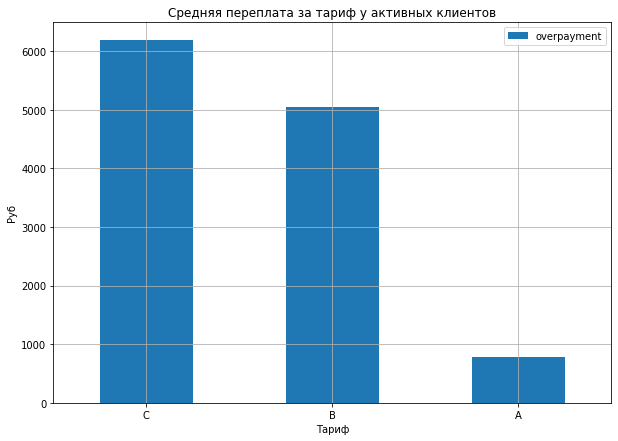

In [44]:
active_cl.pivot_table(index = 'tariff_plan', values = 'overpayment', aggfunc = 'mean').sort_values(by = 'tariff_plan', ascending = False).plot(kind = 'bar', figsize=(10, 7))
plt.title('Средняя переплата за тариф у активных клиентов')
plt.ylabel('Руб')
plt.xlabel('Тариф')
plt.xticks(rotation = 0)
plt.grid()
plt.show()

**В среднем пользоватеи с тарифом С переплачивают за тариф больше 6000 рублей. В то время как пользователои тарифа А платят меньше 1000 рублей**

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Сам анализ экономическог эффекта выполнен в достаточном объеме. Но резальтаты могут изменится, если рассмотреть более полные данные.
    
</div>

### **Вывод по третьей части:**
<a id="3.1"></a>

В третьей части мы работали с активными клиента , т.е те которые совершали дейстия в 11 месяце.Всего таких пользователей 261.Чаще всего клиенты выбирают тариф С(135) , немного меньше тариф В(96) , и с большим отрывом отстает тариф А(30).
Выяснили что 107 активных клиента пользуются оптимальным для себя тарифом. Выручка от активных клиентов составила: 4564670.0 рублей .Если использовать оптимальный тариф то выраучка сотавила бы: 3222488.3 рубля. Клиенты с тарифом А(почти 35000 рублей) в среднем платят за тариф больше чем в 2 раза по сравнению с клиентами у которых тарифы С и В. Однако больше переплачивают  пользователи с тарифом С(более 6000р.) и В(более 5000р).

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

В итоге нам нужно получить таблицу вида

    клиент - старый тариф - новый тариф (можно, чтобы для части клиентов старый и новый тариф совпадали)
    
чтобы понимать, каким клиентам и на какие тарифы предлагать переход.
   
При получении этой таблицы помни, что мы не будем переводить клиентов на новый тариф каждый месяц. Нам нужно по данным за весь предоставленный период сформировать для каждого клиента одну рекомендацию по тарифу (оставаться на старом или переходить на какой-то новый с указанием нового тарифа)

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Данный пункт сделал в разделе Рекомендации
</div>

## Рекомендации
<a id="4"></a>

**Чтобы сократить траты клиентов на тарифы можно попробовать внедрить так называемые ночные тарифы. Т.е колл-центы(клиенты) работающие 24/7 в период с 00-00 по 06-00 , не будут платить за цену сверх лимита , исходящие звонки,
кроме внутренних. Теперь конечно прийдется разделять сутки на две части для подстета , и компания понесет убытки , но это поможет клиентам платить меньше за тарифы**

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Это интересное нестандартное предложение, такое всегда ценится. Но все же если ты решил что-то подобное в проект добавить, стоит подробнее рассматривать результаты этого предложения, экономический эффект и.т.п.  
</div>

In [62]:
d1=merge_sum.groupby('user_id')['optimal_tariff'].unique()
d1=pd.DataFrame(d1)
rec= out_call.groupby('user_id')['tariff_plan'].unique().reset_index()
rec=pd.DataFrame(rec)
recom_tarif= rec.merge(d1 , on ='user_id', how='inner')
recom_tarif

,user_id,tariff_plan,optimal_tariff
0,166377,[B],[A]
1,166391,[C],[C]
2,166392,[C],[C]
3,166399,[C],[C]
4,166405,[B],[A]
...,...,...,...
298,168583,[B],[C]
299,168598,[C],[C]
300,168601,[C],[A]
301,168603,[B],[C]


<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Ок, то, что нужно.
    
Интересно еще было посмотреть, как изменяется в общем распределение по тарифам, показать сравнительную картину.
    
</div>

In [67]:
filtered_df = recom_tarif[recom_tarif['tariff_plan'] != recom_tarif['optimal_tariff']]

filtered_df

,user_id,tariff_plan,optimal_tariff
0,166377,[B],[A]
4,166405,[B],[A]
5,166406,[B],[A]
7,166428,[B],[C]
8,166481,[A],[C]
...,...,...,...
297,168579,[B],[C]
298,168583,[B],[C]
300,168601,[C],[A]
301,168603,[B],[C]


In [83]:
display(len(filtered_df[filtered_df['optimal_tariff']=="A"]))
display(len(filtered_df[filtered_df['optimal_tariff']=="B"]))
display(len(filtered_df[filtered_df['optimal_tariff']=="C"]))

89

17

62

**После досчетов можно сказать , что 168 клиентов используют не оптимальный тариф.И данных следует сделать вывод, что :**
- 89 клиентам следует перейти на тариф А

- 17 клиентам следует перейти на тариф В

- 62 клиентам следует перейти на тариф С

## Гипотезы
<a id="5"></a>

Проверьте гипотезу о том, будет ли средняя плата у активных пользователей тарифа C больше , чем у пользователей с тарифом B . Сделайте вывод.

H0- Переплата C = В

H1- Переплата C != В

In [46]:
B = active_cl.loc[active_cl['tariff_plan'] == 'B', 'current_price']
C = active_cl.loc[active_cl['tariff_plan'] == 'C','current_price']
results = st.ttest_ind(B,C , alternative = 'two-sided')
alpha = 0.05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нельзя отвергнуть нулевую гипотезу')
print(f'Среднея плата за тариф В : {np.mean(B):.2f}')
print(f'Среднея плата за тариф С: {np.mean(C):.2f}')

p-значение: 0.5723069916153197
Нельзя отвергнуть нулевую гипотезу
Среднея плата за тариф В : 16071.58
Среднея плата за тариф С: 14048.40


**Результат теста дает нам понять , статистически значимого различия в оплате нет**

**Среднее количество звонков за весь период не имеет статистически значимых различий**

In [47]:
x = merged_df.loc[merged_df['tariff_plan'] == 'A', 'calls_count']
y = merged_df.loc[merged_df['tariff_plan'] == 'C','calls_count']
z= merged_df.loc[merged_df['tariff_plan'] == 'B', 'calls_count']

In [48]:
statistic, p_value = st.kruskal(x, y, z)

print("Kruskal-Wallis statistic:", statistic)
print("P-value:", p_value)

# Интерпретация результата
alpha = 0.05  # значимость
if p_value < alpha:
    print("Есть статистически значимые различия между группами.")
else:
    print("Нет статистически значимых различий между группами.")

Kruskal-Wallis statistic: 318.04446468539095
P-value: 8.660081788140052e-70
Есть статистически значимые различия между группами.


## Общий вывод по работе:
<a id="6"></a>
- В первой части мы загрузили и обработали данные . Было удалено 4900 дубликата. Удалены аномальные значения .  Были переведены данные в правильный формат

- Во второй части были подсчитаны расходы на каждого клиента , подобран самый выгодный тариф , расчитана переплата клиента если он останется на нынешнем тарифе ,а не выберет выгодный . Выяснили что каждый месяц количество клиентов растет . 

- В третьей части мы работали с данными по активным клиентам. Всего 261 активный клиент , 108 из которых пользуются оптимальным тарифом. Больше всего клиентов пользуюбтся тарифом С , этот же тариф приносит наибольшую сумму в месяц (1896533.8). Также клиенты с тарифом С больше всех переплачивают .Выручка от активных клиентов составила: 4564670 рубля .Если использовать оптимальный тариф то выраучка сотавила бы: 3222488.3 рубля , разница в 41.7%.

- Были предложенны рекомендации для оптимизации тарифов и уменьшению ежемесяцной тарифной платы . Также определено какому количеству пользователей стоит сменить тариф на более оптимальный

- Выдвинуты две гипотезы : О равности переплат между тарифами В и С у активных клиентов. И вторая гипотеза о том , что среднее количество свонков между всеми тарифами за весь период равны.



<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Видно, что технически ты хорошо освоил материал, отлично пользуешься функциями и другими средствами python.
    
Но выводы и комментарии по ходу проекта очень скупые. Читатель должен ясно понимать, что ты делаешь в каждой ячейке кода и почему, что в итоге получаешь. Аналитика - это в большей степени текст, чем код.
    
И в целом логика проекта немного нарушена. Как мы и говорили на созвоне, сначала нужно определить активный период исследования и активных клиентов, и потом только для данных клиентов в выбранный период проводить рассчеты выручки.
</div>

# презентация
https://drive.google.com/file/d/1YaV6rrfQZblZZJ2VNg9zlATLWGITePWq/view?usp=sharing - pdf
https://docs.google.com/presentation/d/1zh9gSIGiRLE14ywCRG9qqXoFZyn49nrh/edit?usp=sharing&ouid=107249728021085218691&rtpof=true&sd=true - pptx

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Презентация зачтена, ее не нужно править.   
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Проект отлично доработан, молодец. Поздравляю с завершением основной части диплома.
    
</div>